# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

## Q1. Is the distribution of body temperatures normal? 

### Exploratory Data Analysis
* Visualise in histogram

In [4]:
# Convert degree F to degree C
df['temperatureC'] = (df['temperature'] - 32)*5/9

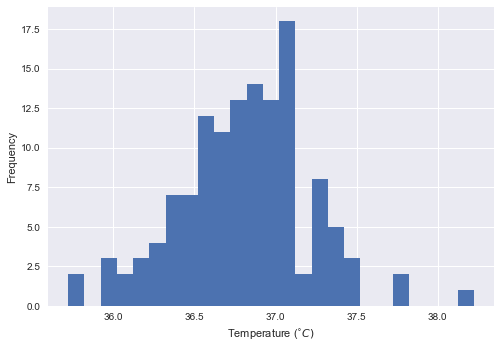

In [136]:
#nbins = int(np.sqrt(len(df['temperature'])))

df['temperatureC'].hist(bins = 25)
plt.xlabel('Temperature ($^{\circ}C)$')
plt.ylabel('Frequency')
plt.show()

<div class="span5 alert alert-success">
<p>The histogram shows the distribution is unimodal and roughly symmetric. </p>
</div>

* Compare the data ECDF (Empirical Cumulative Distribution Function) with a simulated normal distribution's ECDF:

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # The y data of the ECDF go from 1/n to 1 in equally spaced increments. 
    y = np.arange(1, n+1) / n

    return x, y

In [7]:
# Compute mean and standard deviation of the data
mu = np.mean(df.temperatureC)
sigma = np.std(df.temperatureC)

In [8]:
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

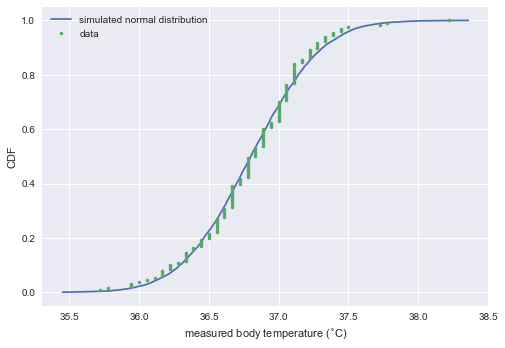

In [9]:
# Get the CDF of the samples and of the data
x_th, y_th = ecdf(samples)
x, y = ecdf(df.temperatureC)

# Plot the CDFs and show the plot
_ = plt.plot(x_th, y_th)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('measured body temperature ($^{\circ}$C)')
_ = plt.ylabel('CDF')
_ = plt.legend(['simulated normal distribution', 'data'])
plt.show()

<div class="span5 alert alert-success">
<p>From the ECDF, the data align quite well with the simulated normal distribution. </p>
</div>

* QQ plot for checking normality

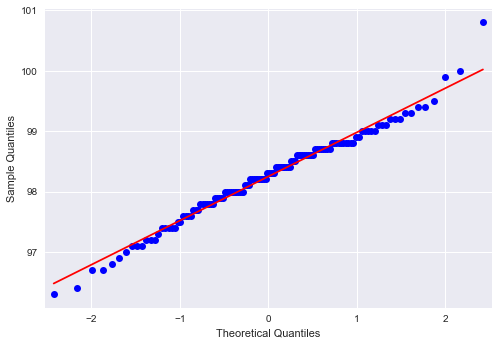

In [10]:
qqplot(df.temperature, line='s')
plt.show()

<div class="span5 alert alert-success">
<p>Except for the maximum point (which seems to be an outlier), the data aligns quite well with the theoretical normal distribution curve. </p>
</div>

### Statistical Normality Tests
* __Shapiro-Wilk Test__

The Shapiro–Wilk test tests the null hypothesis that a sample x1, ..., xn came from a normally distributed population. The test statistic is W. The null-hypothesis of this test is that the population is normally distributed. Assume a significance level of 0.05. 

In [11]:
W, p = shapiro(df.temperatureC)
print('The calculated p-value is ' + str(round(p, 2)) + '.')

The calculated p-value is 0.23.


<div class="span5 alert alert-success">
<p>The above p-value is greater than the pre-set significance level of 0.05, suggesting that the data is normally distributed. </p>
<p>From both the exploratory data analysis and statistical normality test, it seems that the data is normally distributed.
</div>

## Q2: Is the sample size large? Are the observations independent?

In [12]:
# sample size
n = len(df.temperature)
n

130

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. But the central limit theorem does not state how large the sample should be. If the population is unimodal and symmetric, even small samples are acceptable. In addition, a general rule of thumb is if n >= 30, then the sampling distribution may be considered normal. 

From the histogram plotted above, the data seems to be unimodal and symmetric. Also, the sample size of 130 already exceeds n >= 30, so it may be considered large enough. 

As for the independent condition, assuming the data was drawn randomly from the population without replacement, a 10% condition applies. Our sample size of 130 is well within the 10% of the total population, therefore the observations can be considered as independent. 

## Q3. Is the true population mean really 98.6 degrees F, or 37 degree C?

In [13]:
np.mean(df['temperatureC'])

36.80512820512822

From the above, the sample mean is 36.805, which is lower than 37.0. 

1. Bootstrap hypothesis testing
    * Step 1: State the null and alternative hypotheses: 
            H0: mean = 37.0 degree C
            Ha: mean < 37.0 degree C
    * Step 2: Set the significance level . We’ll choose 0.05.
    * Step 3: Calculate the p-value corresponding to mean < 37.0 (one-tailed test).

In [14]:
# Function to create a function for a 1D array data (bootstrapped)
def bootstrap_replicate_1d(data, func):   
    return func(np.random.choice(data, size=len(data)))

In [15]:
# Function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [16]:
# Shift the data so that the data mean is 37.0 degree C
translated_temp = df['temperatureC'] - np.mean(df['temperatureC']) + 37.0

# Take bootstrap replicates, i.e., the mean, of translated_temp
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

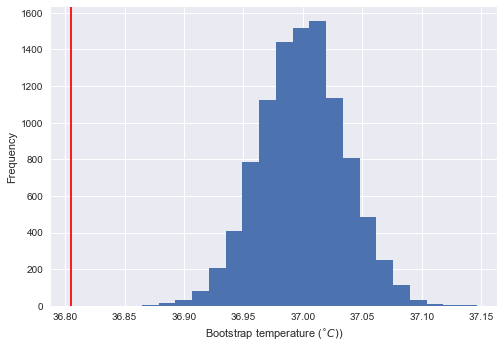

In [137]:
plt.hist(bs_replicates, bins=20);
plt.axvline(36.805, color = 'red')
plt.xlabel('Bootstrap temperature ($^{\circ}C)$)')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Compute the p-value (fraction of replicates that are less than the observed mean)
p = np.sum(bs_replicates <= np.mean(df['temperatureC']))/ 10000
p

0.0

<div class="span5 alert alert-success">
The calculated p-value is 0. Also, from the histogram of the bootstrap replicates, none of the means is as low as 36.80. Therefore, we can reject the null hypothesis, i.e., the true population mean is not 37.0 degree C. 
</div>

### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the  t or  z statistic?

<div class="span5 alert alert-success">
<li> A one-sample test would be used, as two-sample tests are for comparing the difference between two groups to see if their difference is significant or due to random chance. In our case, we only have one group of temperature data, hence using one-sample test is appropriate.  

<li> In general, a t-statistic is used when the population variance is unknown and the sample size is small. If the sample size is large enough, i.e., > 30, the t-distribution approaches that of a standard normal distribution. In our case, n = 130, so using a z-statistic is appropriate. 
<p> 
<p> Null hypothesis and alternative hypothesis defined:
    <li>H0: mean = 37.0 degree C
    <li>Ha: mean < 37.0 degree C
</div>

In [19]:
n = len(df.temperature)

# Calculate the sample mean
s_mean = np.mean(df['temperatureC'])

# The sample standard deviation
s_sd = np.std(df['temperatureC'])

# z-statistic
z = (s_mean - 37.0)/(s_sd/np.sqrt(n))
z                     

-5.4759252020779146

In [20]:
# Convert the z-score to p-value, i.e., the probability of being -5.4 standard deviation away from the mean:
p = st.norm.cdf(z)
p

2.1761575829435712e-08

<div class="span5 alert alert-success">
The calculated p-value is very small, suggesting we can reject the null hypothesis and that the mean is likely to be less than 37.0 degree C.
</div>

### Now try using t-test. How is the result be different? Why?

In [21]:
# If we use the t-statistic
t = (s_mean - 37.0)/(s_sd/np.sqrt(n))

# p-value
pval = st.t.sf(np.abs(t), n-1)
pval

1.0943732312057704e-07

<div class="span5 alert alert-success">
The calculated p-value is greater than that of z-test. This is because the Student t-distributions generally have wider bell curves than the standard normal distribution (from the z-test). As the sample size (i.e., degree of freedom) increases, the bell curve of t-distribution will get narrower and approach that of a standard normal distribution. Therefore, for the same distance away from the mean, the area under bell curve tails of a t-distribution would be greater than that from a z-statistic. 
</div>

## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  t and z statistic?

In [138]:
# Draw 10 samples from the data
sample = np.random.choice(df['temperatureC'], size = 10)

# Calculate the sample mean
sample_mean = np.mean(sample)

# The sample standard deviation
sample_sd = np.std(sample)

__z-test__

In [139]:
# z-statistic
z = (sample_mean - 37.0)/(sample_sd/np.sqrt(10))

# Convert the z-score to p-value
p = st.norm.cdf(z)
p

0.040908570838536724

__t-test__

In [140]:
# t-statistic
t = (sample_mean - 37.0)/(sample_sd/np.sqrt(10))

# p-value
pval = st.t.sf(np.abs(t), 10-1)
pval

0.0579038960504984

<div class="span5 alert alert-success">
<p>In this case we only have a small sample size of 10, so the t-test would be the correct one to use. </p>
<p>From the above calculations, the p-value of the t-test is greater than that of the z-test. This is as expected, since the t-test compensates the small sample size by increasing the probability in the tails of the t-distribution, thus reducing the chance of rejecting the null hypothesis, i.e., less likely to make an error by accepting the alternative hypothesis. 
</div>

## Q5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

__Bootstrap approach__

In [25]:
# Function to draw bootstrap one sample from the data array, for n number of times.
def draw_bs_1_sample(data, n=1):
    """Draw 1 bootstrap sample from data for n times ."""

    # Initialize array of replicates: bs_rep
    bs_rep = np.empty(n)

    # Generate replicates
    for i in range(n):
        bs_rep[i] = np.random.choice(data, size=1)

    return bs_rep

In [26]:
# Original data mean
x_bar = np.mean(df.temperatureC)

# Draw 1 bootstrap sample from the original data, repeat this for 10000 times and and store the result in x_star.
x_star = draw_bs_1_sample(df.temperatureC, 10000)

# Calculate the difference between each x_star and the original data mean
delta = x_star - x_bar

# Calculate the margin of error corresponding to 95% confidence interval
delta_1, delta_2 = np.percentile(delta, [2.5, 97.5])

In [27]:
# Calculate the 95% confidence interval
boot_CI_low = x_bar - delta_2
boot_CI_high = x_bar - delta_1
print('The confidence interval obtained from the bootstrap approach is: [' + \
      str(round(boot_CI_low, 2)) + ', ' + str(round(boot_CI_high, 2)) + '].')

The confidence interval obtained from the bootstrap approach is: [36.11, 37.67].


__Frequentist approach__

In [28]:
# The standard error of the mean, for 1 draw
sem = np.std(df.temperatureC)

# For a 95% confidence interval, the critical z-score is 1.96, then the margin of error is
Mar = 1.96*sem

# The 95% confidence interval
CI_low = x_bar - Mar
CI_high = x_bar + Mar

print('The confidence interval obtained from the Frequentist approach is: [' + str(round(CI_low, 2)) + ', ' \
     + str(round(CI_high, 2)) + '].')

The confidence interval obtained from the Frequentist approach is: [36.01, 37.6].


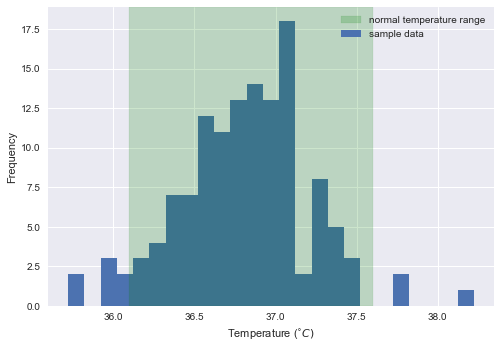

In [142]:
df['temperatureC'].hist(bins = 25)
plt.axvspan(36.1, 37.6, alpha=0.2, color='green')
plt.legend(['normal temperature range', 'sample data'])
plt.xlabel('Temperature ($^{\circ}C)$')
plt.ylabel('Frequency')
plt.show()

<div class="span5 alert alert-success">
<p>If someone's body temperature is outside the range of [36.1, 37.6] degree C, then it is considered 'abnormal'. </p>
</div>

## Q6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [30]:
# Extract male and female data
df_m = df[df.gender == 'M']
df_f = df[df.gender == 'F']

# Mean and standard deviation of the data
df_m_mean = np.mean(df_m.temperatureC)
df_f_mean = np.mean(df_f.temperatureC)
df_m_std = np.std(df_m.temperatureC)
df_f_std = np.std(df_f.temperatureC)

# Difference between the sample means of male and female data
diff = df_m_mean - df_f_mean
print('The difference between the sample means of male and female temperature data is: ' + \
      str(round(diff, 2)) + ' degree C.')

# Sample size
n_m = len(df_m)
n_f = len(df_f)
print('Male data: n = ' + str(n_m))
print('Female data: n = ' + str(n_f))

The difference between the sample means of male and female temperature data is: -0.16 degree C.
Male data: n = 65
Female data: n = 65


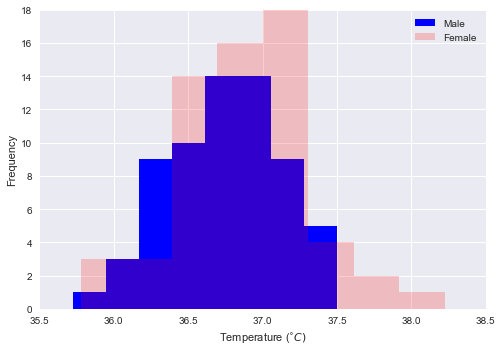

In [143]:
bins_m = int(np.sqrt(n_m))

# Plot the distribution of male and female temperature data
df_m['temperatureC'].hist(bins = bins_m, color = 'blue')
df_f['temperatureC'].hist(bins = bins_m, color = 'red', alpha = 0.2)
plt.legend(['Male', 'Female'])
plt.xlabel('Temperature ($^{\circ}C)$')
plt.ylabel('Frequency')
plt.xlim([35.5, 38.5])
plt.ylim([0, 18])
plt.show()

__Calculate the confidence interval for diff using Frequentist approach__

Reason: The sample size of the data is quite large, i.e., n = 65 for both male and female data. Secondly, the histograms show that the sample distributions are unimodal and symmetric.

Let's define the null and alternative hypotheses: 

            H0: there is no difference between male and female temperature. 
            Ha: there IS difference between male and female temperature.
            
Significance level is assumed to be 0.05. 

In [32]:
# The standard error of the mean
diff_sem = np.sqrt(df_m_std**2/n_m + df_f_std**2/n_f)

# z-statistic
z = (diff - 0)/diff_sem

# Convert the z-score to p-value
p = st.norm.cdf(z)
p

0.010633225915052637

<div class="span5 alert alert-success">
<p>The calculated p-value is 0.01, which is less than the pre-set significance level of 0.05, so we reject the null hypothesis and accept the hypothesis that there is a difference between male and female body temperatures.
</div>

In [33]:
# For a 95% confidence interval, the critical z-score is 1.96, then the margin of error is
diff_Mar = 1.96*diff_sem

# The 95% confidence interval
diff_CI_low = diff - diff_Mar
diff_CI_high = diff + diff_Mar

print('The confidence interval obtained from the Frequentist approach is: [' + \
      str(round(diff_CI_low, 2)) + ', ' + str(round(diff_CI_high, 2)) \
      + '].')

The confidence interval obtained from the Frequentist approach is: [-0.3, -0.02].


## Data Story

__The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?__

<div class="span5 alert alert-success">
<p>The plot below shows a comparison of simulated bootstrap temperature with assumed mean of 37.0, together with the actual data mean of 36.8. The large distance between the two (in fact, they are so far apart that even the tail of the simulated temperature does not encompass the data mean of 36.8), suggests that the assumption of mean body temperature being 37.0$^{\circ}$C is likely to be false.

<p>This is also confirmed by the very small p-value calculated: 2.17e-08. 
</div>

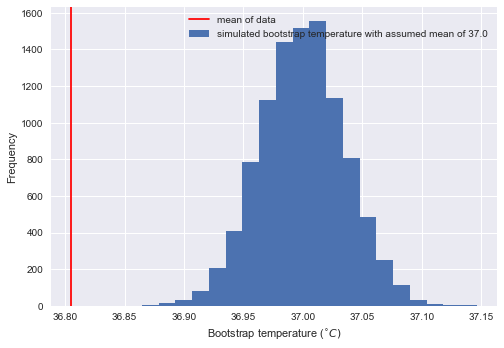

In [144]:
plt.hist(bs_replicates, bins=20);
plt.axvline(36.805, color = 'red')
plt.legend(['mean of data', 'simulated bootstrap temperature with assumed mean of 37.0'])
plt.xlabel('Bootstrap temperature ($^{\circ}C)$')
plt.ylabel('Frequency')
plt.show()

### Abnormal body temperature?

<div class="span5 alert alert-success">
<p>If someone's body temperature is outside the range of [36.1, 37.6]$^{\circ}$C (which is the 95% confidence interval of body temperatures from this dataset), then it is considered 'abnormal'. See chart below for illustration.
</div>

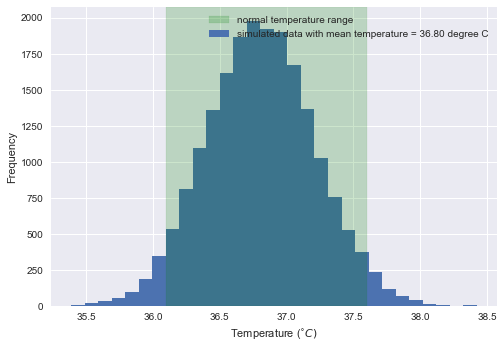

In [145]:
samples = np.random.normal(mu, sigma, 20000)
plt.hist(samples, bins = 30)
plt.axvspan(36.1, 37.6, alpha=0.2, color='green')
plt.legend(['normal temperature range', 'simulated data with mean temperature = 36.80 degree C'])
plt.xlabel('Temperature ($^{\circ}C)$')
plt.ylabel('Frequency')
plt.show()

### Women have higher body temperatures than men. 

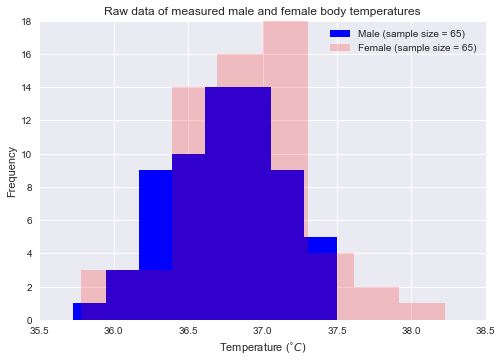

In [146]:
bins_m = int(np.sqrt(n_m))

# Plot the distribution of male and female temperature data
df_m['temperatureC'].hist(bins = bins_m, color = 'blue')
df_f['temperatureC'].hist(bins = bins_m, color = 'red', alpha = 0.2)
plt.legend(['Male (sample size = 65)', 'Female (sample size = 65)'])
plt.title('Raw data of measured male and female body temperatures')
plt.xlabel('Temperature ($^{\circ}C)$')
plt.ylabel('Frequency')
plt.xlim([35.5, 38.5])
plt.ylim([0, 18])
plt.show()

<div class="span5 alert alert-success">
<p>The boxplot below shows the median and interquartile ranges of the measured female and male body temperatures.
</div>

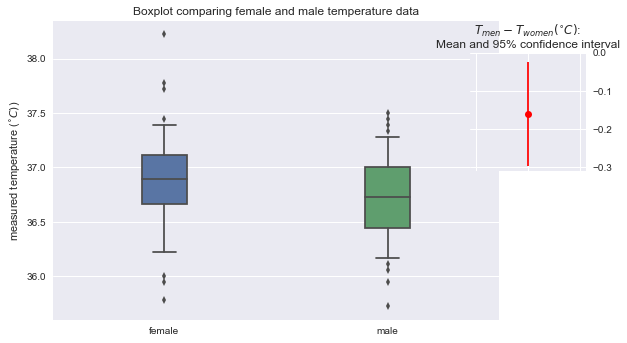

In [133]:
temp = pd.DataFrame({'male': df_m.temperatureC, 'female': df_f.temperatureC})

#plt.subplot(121)
ax1 = sns.boxplot(temp, whis = [5, 95], width = 0.2)
#plt.annotate('upper quartile', xy=(1.05, 37.05), xytext=(1.05, 37.05))
#plt.annotate('lower quartile', xy=(1.05, 36.34), xytext=(1.05, 36.34))
plt.title('Boxplot comparing female and male temperature data')
plt.ylabel('measured temperature ($^{\circ}C)$)')

#plt.subplot(122)
ax2 = plt.axes([0.85, 0.5, 0.2, 0.3])
# error bars
plt.errorbar(x=1, y=diff, yerr = diff_Mar, fmt='or')
plt.title('$T_{men} - T_{women} (^{\circ}C)$: \nMean and 95% confidence interval')
ax2.yaxis.tick_right()
plt.yticks([0, -0.1, -0.2, -0.3])
# Turn off tick labels
ax2.set_xticklabels([])

plt.show()